<a href="https://colab.research.google.com/github/nikitius20/ML_test/blob/main/Denoising_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split


import pandas as pd


In [ ]:
noise_free_list = []
noise_list = []
first_num = 10;
second_num = 1;
for i in range(40):
  one_curve_list = [];
  for j in range(10):

    df = pd.read_csv(f"/content/drive/MyDrive/data/cor_{first_num}_{second_num}_{j}.csv", header=None)


    flat_list = []
    for xs in df.values.tolist():
      for x in xs:
        flat_list.append(x)

    print(f"downloading cor_{first_num}_{second_num}_{j}.csv")
    if(j==0):
      noise_free_list.append(flat_list)
    else:
      one_curve_list.append(flat_list)

  noise_list.append(one_curve_list)

  if(second_num==5):
    second_num = 1;
    first_num += 1;
  else:
    second_num+=1;

downloading cor_10_1_0.csv
downloading cor_10_1_1.csv
downloading cor_10_1_2.csv
downloading cor_10_1_3.csv
downloading cor_10_1_4.csv
downloading cor_10_1_5.csv
downloading cor_10_1_6.csv
downloading cor_10_1_7.csv
downloading cor_10_1_8.csv
downloading cor_10_1_9.csv
downloading cor_10_2_0.csv
downloading cor_10_2_1.csv
downloading cor_10_2_2.csv
downloading cor_10_2_3.csv
downloading cor_10_2_4.csv
downloading cor_10_2_5.csv
downloading cor_10_2_6.csv
downloading cor_10_2_7.csv
downloading cor_10_2_8.csv
downloading cor_10_2_9.csv
downloading cor_10_3_0.csv
downloading cor_10_3_1.csv
downloading cor_10_3_2.csv
downloading cor_10_3_3.csv
downloading cor_10_3_4.csv
downloading cor_10_3_5.csv
downloading cor_10_3_6.csv
downloading cor_10_3_7.csv
downloading cor_10_3_8.csv
downloading cor_10_3_9.csv
downloading cor_10_4_0.csv
downloading cor_10_4_1.csv
downloading cor_10_4_2.csv
downloading cor_10_4_3.csv
downloading cor_10_4_4.csv
downloading cor_10_4_5.csv
downloading cor_10_4_6.csv
d

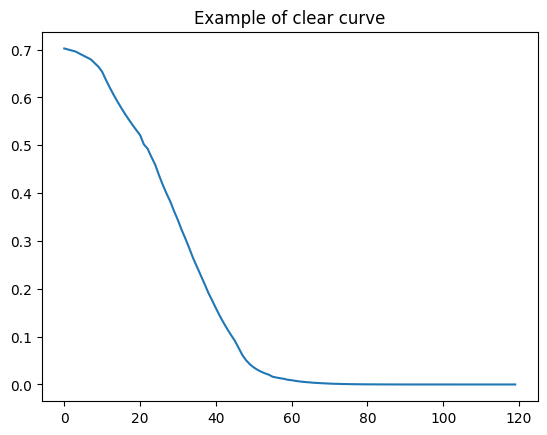

In [ ]:
plt.plot(noise_free_list[1])
plt.title("Example of clear curve")
plt.show()

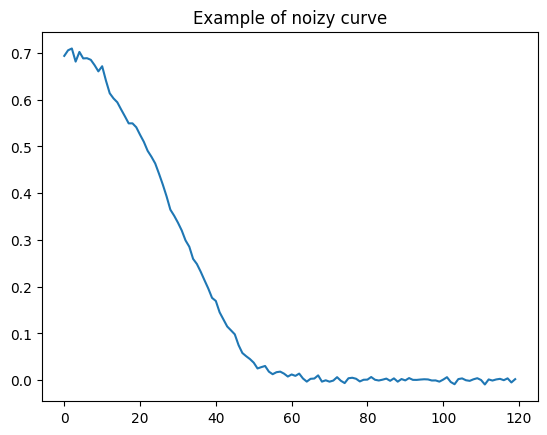

In [ ]:
plt.plot(noise_list[1][0])
plt.title("Example of noizy curve")
plt.show()

In [ ]:
class Model(nn.Module):

  def __init__(self):
    super().__init__()




    '''                                               Tried different modules, but not succesfull
     self.encoder = nn.Sequential(
        nn.Conv1d(120, 60, kernel_size=3),
        nn.ReLU(),
        nn.Conv1d(60, 20, kernel_size=3),
        nn.ReLU(),
        nn.Conv1d(20, 5, kernel_size=3)

    self.decoder = nn.Sequential(
        nn.ConvTranspose1d(5, 20, kernel_size=3),
        nn.ReLU(),
        nn.ConvTranspose1d(20, 60, kernel_size=3),
        nn.ReLU(),
        nn.ConvTranspose1d(60, 120, kernel_size=3),
    )
    '''

    self.encoder = nn.Sequential(
        nn.Linear(120, 60),
        nn.ReLU(),
        nn.Linear(60, 30),
        nn.ReLU(),
        nn.Linear(30, 12),
        nn.ReLU(),
        nn.Linear(12, 3),
    )
    self.decoder = nn.Sequential(
        nn.Linear(3, 12),
        nn.ReLU(),
        nn.Linear(12, 30),
        nn.ReLU(),
        nn.Linear(30, 60),
        nn.ReLU(),
        nn.Linear(60, 120),
    )

  def forward(self, x):
    encoded = self.encoder(x);
    decoded = self.decoder(encoded);

    return decoded

In [ ]:
model = Model()

criterian = nn.MSELoss();

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.00001)

#print(noise_list)
noise_list = torch.FloatTensor(noise_list)
print(noise_list.shape)

noise_free_list = torch.FloatTensor(noise_free_list)
print(noise_free_list)



torch.Size([40, 9, 120])
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [7.0247e-01, 7.0030e-01, 6.9816e-01,  ..., 8.6122e-10, 3.7713e-10,
         1.1459e-10],
        [6.1165e-01, 5.8548e-01, 5.6323e-01,  ..., 7.8965e-07, 6.6677e-07,
         5.3185e-07],
        ...,
        [1.0298e-01, 1.0044e-01, 9.8108e-02,  ..., 1.6367e-05, 1.4063e-05,
         1.1477e-05],
        [8.7914e-01, 8.7053e-01, 8.6268e-01,  ..., 6.7046e-03, 5.7271e-03,
         4.6199e-03],
        [5.7560e-01, 5.7119e-01, 5.6692e-01,  ..., 2.0265e-05, 1.5390e-05,
         1.0675e-05]])


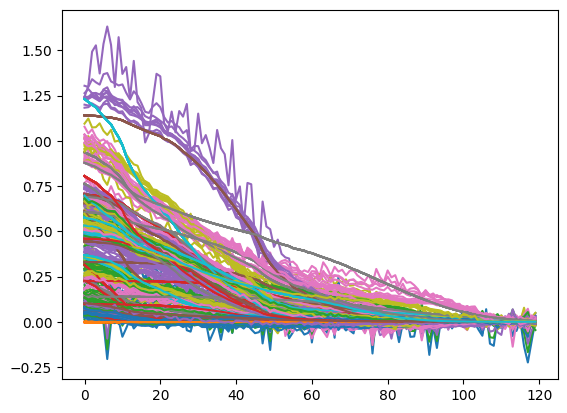

In [ ]:
epoch = 10;
losses = []
for e in range(epoch):
  for i in range(len(noise_list)):
    for j in range(8):
      #plt.plot(noise_list[i][j].detach().numpy())
      y_pred = model.forward(noise_list[i][j]);

      #plt.plot(y_pred.detach().numpy())
      loss = criterian(y_pred, noise_free_list[i]);

      #plt.plot(noise_free_list[i].detach().numpy())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      losses.append(loss.detach().numpy())

    y_pred = model.forward(noise_list[i][0]);
    plt.plot(y_pred.detach().numpy())

    plt.plot(noise_free_list[i].detach().numpy())
    #print(f'curve: {i}, and loss: {loss}');

#plt.plot(losses)

torch.Size([40, 9, 120])
[ 6.0577291e-01  5.7316351e-01  5.7678348e-01  5.4979956e-01
  5.2064031e-01  4.8862806e-01  4.7203627e-01  4.4504276e-01
  4.1725430e-01  3.8879883e-01  3.6241356e-01  3.1164840e-01
  3.0023357e-01  2.6852748e-01  2.5266856e-01  2.4235940e-01
  2.1947932e-01  2.1237466e-01  2.0262907e-01  1.8809268e-01
  1.8516164e-01  1.6617511e-01  1.5612225e-01  1.4046472e-01
  1.3657907e-01  1.3053645e-01  1.1768056e-01  1.1074472e-01
  1.0096610e-01  8.7852105e-02  8.7765314e-02  7.3114209e-02
  7.0894159e-02  6.4470805e-02  5.6990162e-02  5.4333031e-02
  5.2883111e-02  4.3625675e-02  3.7320942e-02  3.5299145e-02
  3.2531466e-02  2.9181512e-02  2.7824745e-02  2.3590334e-02
  2.6111772e-02  1.8841889e-02  1.0244522e-02  1.3143444e-02
  1.3161849e-02  1.4167596e-02  1.3034863e-02  4.0334142e-03
  4.3029208e-03 -2.8560861e-04  2.5120967e-03  4.1080834e-03
  2.5807838e-03  1.0837545e-02  1.1882906e-02  1.2347472e-03
  9.2355488e-04  8.5960457e-04  2.2475979e-05  1.8674827e-03

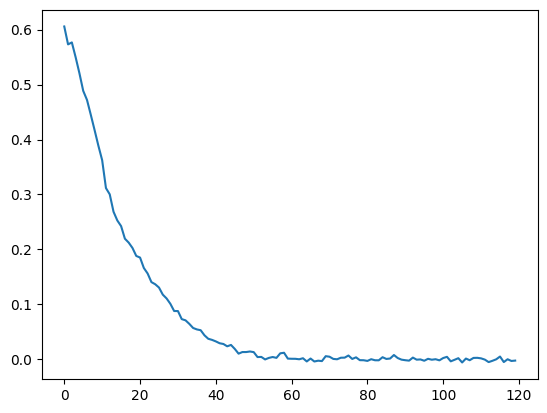

In [ ]:
print(noise_list.shape);
print(noise_list[2][0].detach().numpy())
plt.plot(noise_list[2][0].detach().numpy())

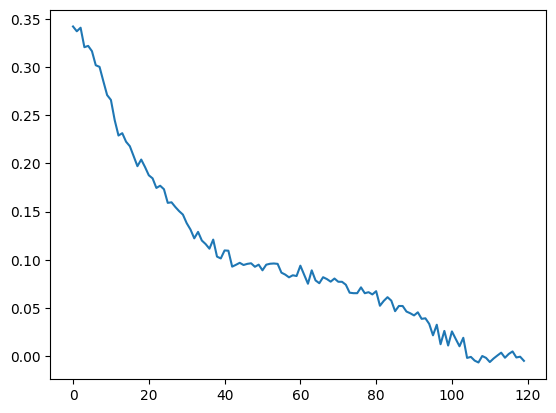

In [ ]:
plt.plot(model.forward(noise_list[2][0]).detach().numpy())

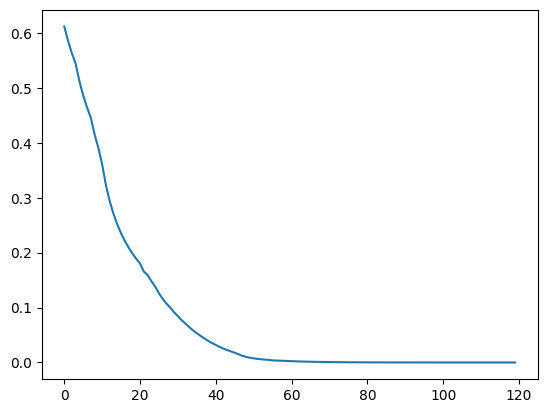

In [ ]:
plt.plot(noise_free_list[2].detach().numpy())

noise_free_list = []
noise_list = []

df = pd.read_csv(f"/content/drive/MyDrive/data/cor_0_1_0.csv", header=None)
flat_list = []
for xs in df.values.tolist():
  for x in xs:
    flat_list.append(x)

noise_free_list = flat_list



df = pd.read_csv(f"/content/drive/MyDrive/data/cor_0_1_1.csv", header=None)
flat_list = []
for xs in df.values.tolist():
  for x in xs:
    flat_list.append(x)

noise_list.append(flat_list)




df = pd.read_csv(f"/content/drive/MyDrive/data/cor_0_1_2.csv", header=None)
flat_list = []
for xs in df.values.tolist():
  for x in xs:
    flat_list.append(x)

noise_list.append(flat_list)



df = pd.read_csv(f"/content/drive/MyDrive/data/cor_0_1_3.csv", header=None)
flat_list = []
for xs in df.values.tolist():
  for x in xs:
    flat_list.append(x)

noise_list.append(flat_list)




df = pd.read_csv(f"/content/drive/MyDrive/data/cor_0_1_4.csv", header=None)
flat_list = []
for xs in df.values.tolist():
  for x in xs:
    flat_list.append(x)

noise_list.append(flat_list)


df = pd.read_csv(f"/content/drive/MyDrive/data/cor_0_1_5.csv", header=None)
flat_list = []
for xs in df.values.tolist():
  for x in xs:
    flat_list.append(x)

noise_list.append(flat_list)



print(noise_free_list)
print(noise_list)


plt.plot(noise_free_list)
plt.plot(noise_list[0])
plt.plot(noise_list[1])
plt.plot(noise_list[2])
plt.plot(noise_list[3])
plt.plot(noise_list[4])
plt.show()